Based on: https://github.com/Harvard-IACS/2018-CS109A/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

### Part 1: Neural Networks 101: Starting with a Single Node

The simplest way to describe a neural network is that we have some inputs $x$, which get combined into an auxilliary variable $z$.  The auxilliary variable is passed through the activation function $\sigma\left(z\right)$ and the result is the output.

Here is another image showing each step.

![](../fig/expanded-perceptron.png)

Notice that the inputs are linearly combined according to some weights $w$ and a bias $b$.  This transformation is also sometimes called an **affine** transformation.  The perceptron transforms the weighted inputs according to the rule of the activation function.  For a single perceptron, the output $y$ is just the output from the perceptron.  The linear transformation and activation of the neuron occurs within a single **layer** of the network (shown in the dotted box).

Let's see what the single-layer, single neuron network give us.  We have a couple of choices to make:
1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a *sigmoid* activation function $$\sigma\left(z\right) = \dfrac{1}{1 + e^{-z}}.$$  What are the limits $\displaystyle\lim_{z\to\infty}\sigma\left(z\right)$ and $\displaystyle\lim_{z\to-\infty}\sigma\left(z\right)$?  Actually, the sigmoid we have here is called the *logistic* function.  Sigmoids are really a family of functions and the logistic function is just one member in that family.

<div class="exercise"><b>In class exercise : Plot the sigmoid</b></div>

Plot the sigmoid

In [2]:
# your code here

In [3]:
# %load solutions/sigmoid.py
def sigmoid(z):
    return 1/ (1 + np.e**(-z))


Generate a list of 500 $x$ points from -5 to 5 and plot both the sigmoid and the tanh (for tanh you may use `np.tanh`)

What do you observe?

[-5.         -4.97995992 -4.95991984 -4.93987976 -4.91983968]


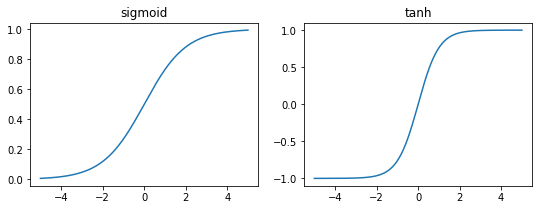

In [4]:
# %load solutions/plot_sig.py
x = np.linspace(-5.0, 5.0, 500) # input points
print(x[:5])
### plot
plt.figure(figsize = (9, 3))

plt.subplot(121)
plt.plot(x, [sigmoid(i) for i in x], label = 'sigmoid')
plt.title('sigmoid')

plt.subplot(122)
plt.plot(x, [np.tanh(i) for i in x], label = 'tanh')
plt.title('tanh')

plt.show()

##### Comments
* We say that the activation occurs when $\sigma = \dfrac{1}{2}$.  We can show that this corresponds to $x = -\dfrac{b}{w}$.
* The "steepness" of the sigmoid is controlled by $w$.

<div class="exercise"><b>In class exercise: Approximate a Gaussian function using a node</b></div>

The task is to approximate (or learn) a function $f\left(x\right)$ given some input $x$.  For demonstration purposes, the function we will try to learn is a Gaussian function 
\begin{align}
f\left(x\right) = e^{-x^{2}}
\textrm{}
\end{align}

Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.  

Start by plotting the above function using the $x$ dataset you created earlier

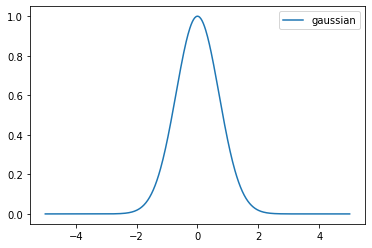

In [5]:
f = np.exp(-x*x) # The real function, x = np.linspace(-5.0, 5.0, 500) input points

plt.plot(x, f, label='gaussian')
plt.legend()

Now, let's code the single node as per the image above. Write a function named `affine` that does the linear transformation.

In [6]:
# your code here
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    z =  w*x + b
    return z

In [7]:
# %load solutions/affine.py

In [8]:
# %load solutions/sigmoid.py

In [9]:
# your code here
w = -4.5
b = 4.

h = sigmoid(affine(x,w,b))

In [10]:
h;

In [11]:
# %load solutions/perceptron.py
w = -2.5 # weight
b = 1.0 # bias

# Perceptron output
z = affine(x, w, b) # Affine transformation
h = sigmoid(z) # Sigmoid activation


And now we plot the activation function and the true function.

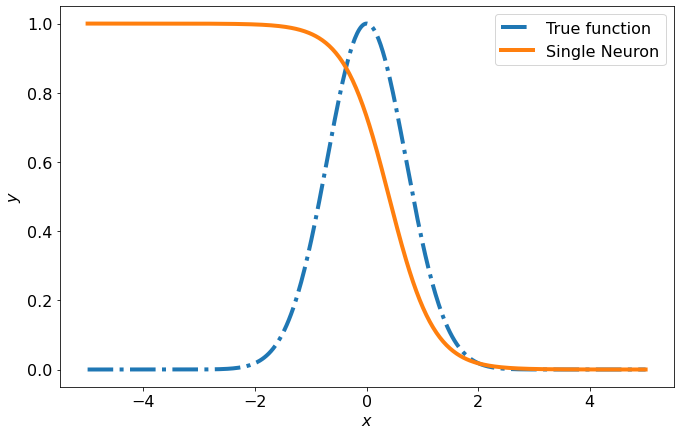

In [12]:
fig, ax = plt.subplots(1,1, figsize=(11,7)) # create axes object

SIZE = 16
# Plot
ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

The single perceptron simply turns the output on and off at some point, but that's about it.  We see that the neuron is on until about $x=0$ at which point it abruptly turns off.  It's able to get "close" to the true function.  Otherwise, it has nothing in common with the true function.

What do you think will happen if you change $w$ and $b$?

#### Important Observation
Notice that we wrote the output as `sigmoid(affine(x))`.  This was not a coincidence.  It looks like a composition of functions.  In fact, that is what a neural network is doing.  It's building up an approximation to a function by creating a composition of functions.  For example, a composition of three functions would be written as $$\varphi_{3}\left(\varphi_{2}\left(\varphi_{1}\left(x\right)\right)\right).$$

What happens if we play with the weights and biases?

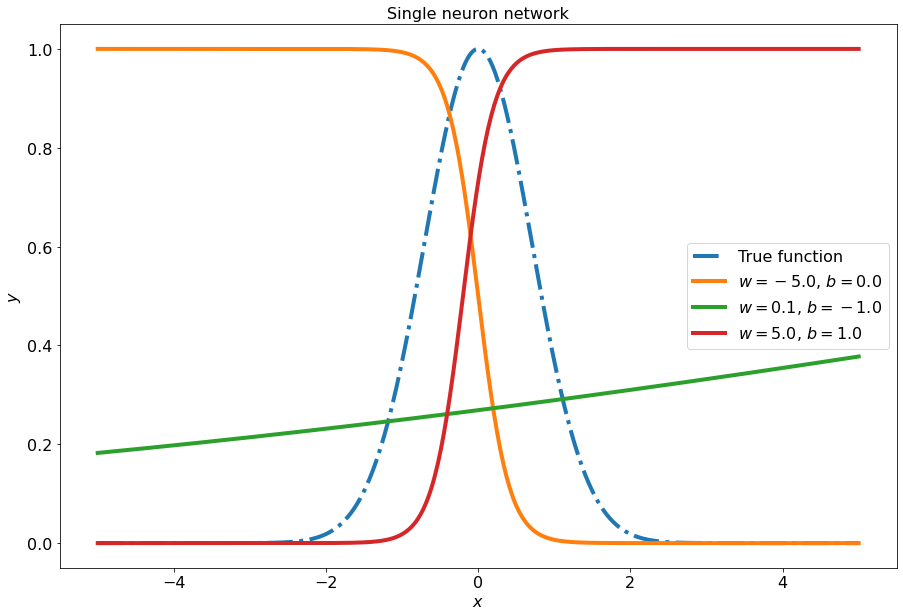

In [13]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(x, f, lw=4, ls='-.', label='True function')
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

Let's try to make our network more flexible by using **more nodes**!

## Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of nodes/neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting layers next to each other.  The other option is to stack neurons on top of each other in the same layer.  Now the network has some width, but is still only one layer deep.

The following figure shows a single-layer network with two nodes in one layer.

![](../fig/multiple-perceptrons.png)

#### Some observations
1. We still have a single input in this case.  Note that this is not necessary in general.  We're just keeping things simple with a single input for now. If we have more inputs we will have a matrix for $X$.
2. Each node (or neuron) has a weight and bias associated with it.  An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network.  There are a variety of ways of accomplishing this.  In the current example, we just take a linear combination of the node outputs to produce the actual prediction.  Notice that now we have weights and biases at the output too.

Let's see what happens in this case.  First, we just compute the outputs of each neuron.

In [14]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

Now let's plot things and see what they look like.

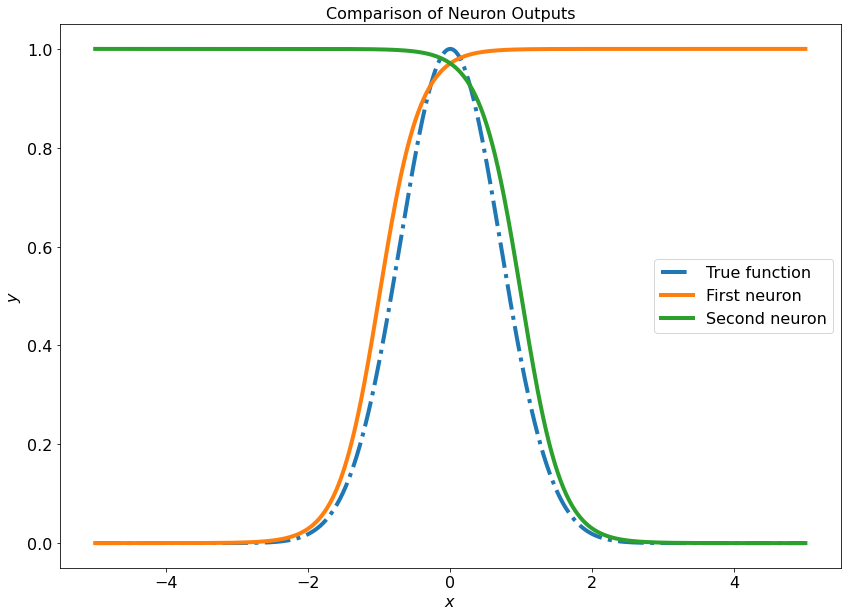

In [15]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Just as we expected.  Some sigmoids.  Of course, to get the network prediction we must combine these two sigmoid curves somehow.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

#### Note
We are **not** doing classification here.  We are trying to predict an actual function.  The sigmoid activation is convenient when doing classification because you need to go from $0$ to $1$.  However, when learning a function, we don't have as good of a reason to choose a sigmoid.

In [16]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = 0 # No bias yet
yout = wout[0] * h1 + wout[1] * h2 + bout

And plot.

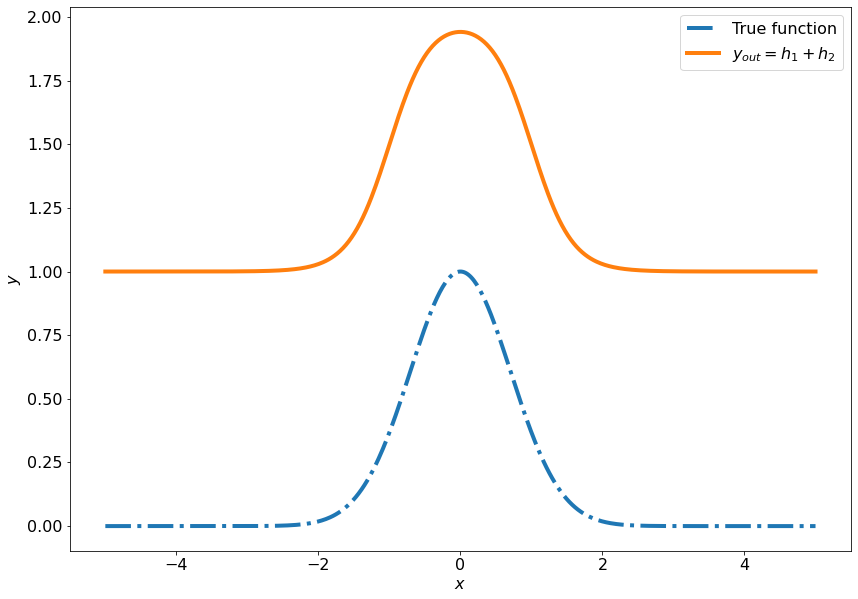

In [17]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

#### Observations
* The network prediction is still not good. *But*, it is pretty sophisticated.  We just have two neurons, but we get some pretty interesting behavior. We didn't do anything with the output weights.  Those are probably important.  Now let's see what happens when we change the weights on the output.

In [18]:
# Network output
wout = np.array([-1.5, -1.5])
bout = np.array(1.5)

yout = wout[0] * h1 + wout[1] * h2 + bout

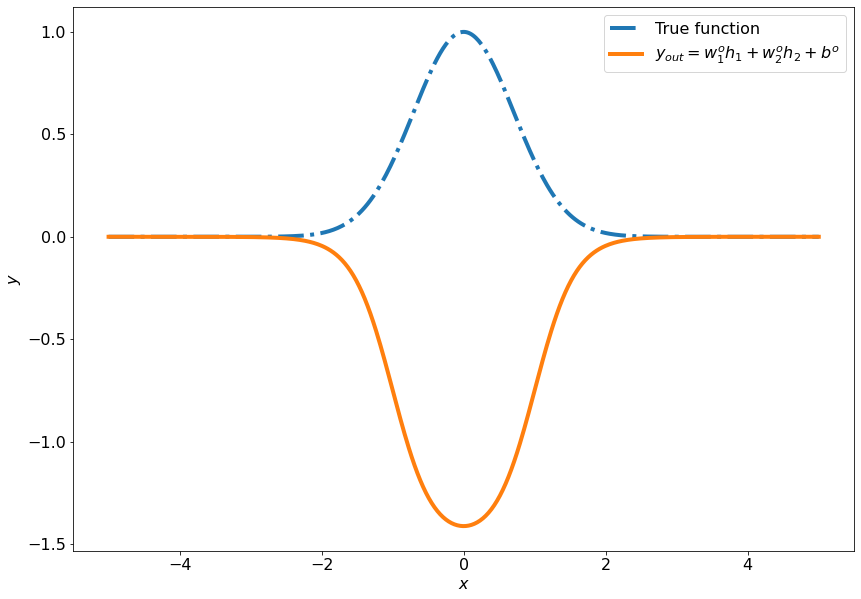

In [19]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

We can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Some Mathematical Notation
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.  We'll illustrate the ideas with the two-node network.

Suppose we have a single input $x$ to a single-layer two-node network.  We can store the weights from each node in a vector $\mathbf{w} \in \mathbb{R}^{2}$.  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{2}$.  The affine transformation is then written as $$\mathbf{z} = \mathbf{w}x + \mathbf{b}$$ where the usual laws of vector addition and multiplication by a scalar apply.  Of course, we have that $\mathbf{z} \in \mathbb{R}^{2}$ as well.  Next we evaluate the output from each node.  Formally, we write $$\mathbf{h} = \sigma\left(\mathbf{z}\right)$$ where, once again, $\mathbf{h}\in\mathbb{R}^{2}$.  Moreover, it is *understood* that $\sigma$ operates on each individual element of $\mathbf{z}$ separately.  If we denote each component of $\mathbf{z}$ by $z_{j}, \quad j = 1, 2$ then we can write $$h_{j} = \sigma\left(z_{j}\right), \quad j = 1, 2.$$

Lastly, we must do something about the output layer.  Mathematically we write $$y_{out} = \mathbf{w}_{out} \cdot \mathbf{h} + b_{out}$$ where $\mathbf{w}_{out} \in \mathbb{R}^{2}$ and $b_{out} \in \mathbb{R}$.

## Backpropagation

У даному пункті виконайте backpropagation для мережі з 
- одним входом х 
- одним прихованим шаром, що має 2 нейрони, з активацією сигмоїд
- одним виходом (z3) з лінійною активацією

![](nn_scheme.jpg)

In [20]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

In [21]:
x = 1.

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [22]:
### do the forward pass of the network
### out = z3
z_1_2, z_3 = 0,0
def forward():
    global z_1_2, z_3
    z_1_2 = w_1 * x + b_1 # working with vector [z1, z2]
    h_1_2 = sigmoid(z_1_2)

    z_3 =  h_1_2 @ w_2 + b_2

In [23]:
z_3

0

In [24]:
actual = gaussian(x)
y = actual
actual

0.36787944117144233

In [25]:
def backprop(lr=1):
    global w_1, w_2, b_1, b_2
    #### DERIVATIVES CALCULATION
    dL_dw1 = 2 * (z_3 - y) * w_2 * sigmoid_derivative(z_1_2) * x
    dL_dw2 = 2 * (z_3 - y) * sigmoid(z_1_2)

    dL_db1 = 2 * (z_3 - y) * w_2 * sigmoid_derivative(z_1_2)
    dL_db2 = 2 * (z_3 - y) 

    ##### WEIGHTS UPDATE

    w_1 -= lr * dL_dw1
    w_2 -= lr * dL_dw2
    b_1 -= lr * dL_db1
    b_2 -= lr * dL_db2

In [26]:
backprop()

In [27]:
### do again the forward pass of the network
forward()
z_3

array([2.72790137])

Nope

Now let's write it into a loop

In [28]:
N = 50000
lr = 0.01

In [29]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    y = gaussian(x)

    forward()
    backprop(lr=lr)

Now let's plot things and see what they look like.

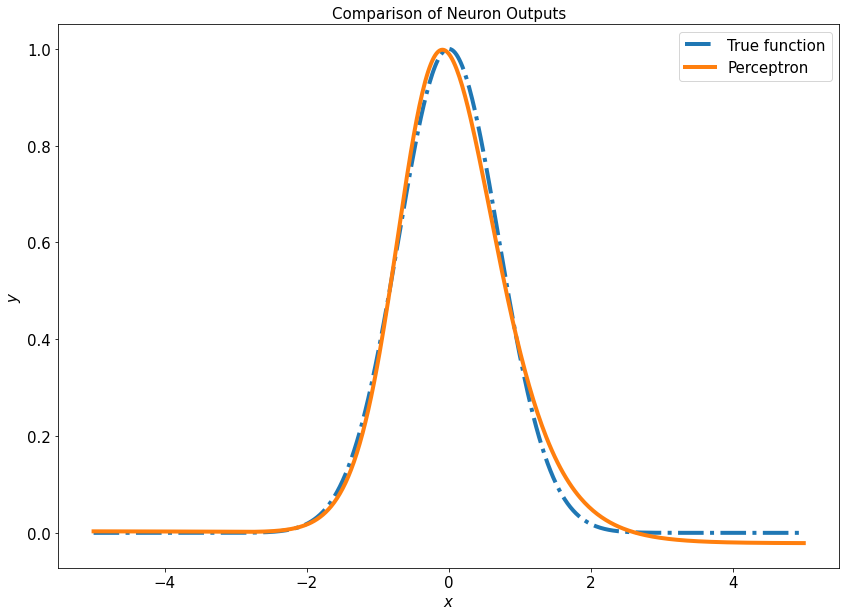

In [30]:
z1 = w_1[0] * X + b_1[0]
z2 = w_1[1] * X + b_1[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

z3 = w_2[0] * h1 + w_2[1] * h2 + b_2[0]
out = z3


SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
#ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

### Classification problem

In [31]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import log_loss, accuracy_score
from pandas import DataFrame

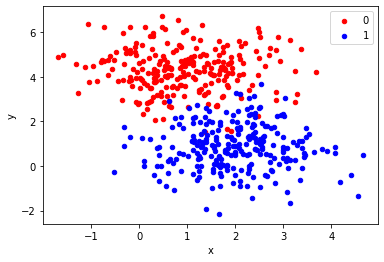

In [32]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [33]:
X.shape

(500, 2)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [35]:
x = X_test

In [36]:
##### initialization

w_1 = np.array([1,1])
b_1 = np.array([1])

In [37]:
z1 = w_1.dot(x.T) + b_1

# Node outputs
h1 = sigmoid(z1)

In [38]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

0.45

In [39]:
### Loop

In [40]:
N = 10000

In [41]:
batch_size = 10

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])
lr=0.01

for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]
        
        m = x.shape[0]
        #### FORWARD PASS
        z_1 = x @ w_1 + b_1
        h_1 = sigmoid(z_1)


        #### DERIVATIVES CALCULATION
        dL_dw1 = (h_1 - y) @ x
        dL_db1 = sum(h_1 - y)
        

        ##### WEIGHTS UPDATE
        w_1 -= lr * dL_dw1
        b_1 -= lr * dL_db1
        

In [42]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)


0.95